In [12]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [13]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [14]:
#Importing YouTube comments data
#data = pd.read_csv('../input/glassdoorreviews.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments
data = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv');#opening the file UScomments

In [15]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [16]:
#Displaying the first 5 rows of the data
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt.,Lodging,Hotels Motels,Hotel",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g32438-d81780-Reviews-Best_Western_Plus_South_Coast_Inn-Goleta_California.html,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few train passed during our stay. Best Western changed hotel classification. The Plus category are not the same as before.",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,"https://www.tripadvisor.com/Hotel_Review-g32438-d81780-Reviews-Best_Western_Plus_South_Coast_Inn-Goleta_California.html,https://www.yellowpages.com/goleta-ca/mip/best-western-plus-south-coast-inn-21941589,http://www.citysearch.com/profile/717767/goleta_ca/best_western.html,https://www.booking.co...","https://www.bestwestern.com/en_US/book/hotel-rooms.05521.html?iata=00171890andssob=BLBWI0003Gandcid=BLBWI0003G:yext:website:05521,https://www.bestwestern.com/en_US/book/hotel-rooms.05521.html?iata=00171890&ssob=BLBWI0003G&cid=BLBWI0003G:yext:website:05521"
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/50035798,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g32172-d76386-Reviews-or30-BEST_WESTERN_Carmel_s_Town_House_Lodge-Carmel_Monterey_Peninsula_California.html%252523REVIEWS,"We stayed in the king suite with the separation between the bedroom and the living space. The sofa bed wasn't very good I had back discomfort by the day we left on our three night stay. The room is clean, and the king bed very comfortable. This hotel is located within walking distance to most pl...",Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,"http://www.tripadvisor.com/Hotel_Review-g32172-d76386-Reviews-or30-BEST_WESTERN_Carmel_s_Town_House_Lodge-Carmel_Monterey_Peninsula_California.html%252523REVIEWS,https://www.yellowpages.com/carmel-ca/mip/best-western-carmels-town-house-lodge-496678069,http://www.tripadvisor.com/Hotel_Review-g321...",http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/50035798,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g32172-d76386-Reviews-or40-BEST_WESTERN_Carmel_s_Town_House_Lodge-Carmel_Monterey_Peninsula_California.html%252523REVIEWS,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try the breakfast, I was there for business so the restaurant opened to late for the business world to enjoy, I had to asked for coffee for my room, And the items in the vending machine were stale.",Business,Prescott Valley,AZ,15Deborah,"http://www.tripadvisor.com/Hotel_Review-g32172-d76386-Reviews-or30-BEST_WESTERN_Carmel_s_Town_House_Lodge-Carmel_Monterey_Peninsula_California.html%252523REVIEWS,https://www.yellowpages.com/carmel-ca/mip/best-western-carmels-town-house-lodge-496678069,http://www.tripadvisor.com/Hotel_Review-g321...",http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/50035798,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g32172-d

In [17]:
#Finding the size of the data
data.shape

(10000, 26)

In [18]:
#Extracting 1000 random samples from the data
comm = data.sample(5000)
comm.shape

(5000, 26)

In [19]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in comm['reviews.text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [20]:
#Adding the Sentiment Polarity column to the data
comm['polarity']=polarity
comm['subjectivity']=subjectivity

In [21]:
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity<0].head(10)

,name,reviews.text,polarity,subjectivity
4735,Seattle Pacific Hotel,"This place was a last minute internet booking, we flew back home the next day, will never happen again. The bed sheets seemed used already, there were nasty staines on the side of the matress that was not covered. The towels had a bad, dirty smell to them, need I say more... We stayed out for di...",-0.297500,0.492500
15,The Whitney Hotel,"This Hotel, formerly a prestigious bank, may be attractive for history buffs, but is an expensive and horrible place to stay when you visit New Orleans. The rooms are SMALL, unattractive, with terrible old bedding, virtually without windows or amenities. Parking was 38/day, and it took 35 min. t...",-0.041127,0.500326
4732,Seattle Pacific Hotel,"Not fit for human occupancy. No internet, even though they advertise 2 connections. Bagels, mini muffins, apples, and OJ for breakfast They ask you to place used plastic knives in a receptacle so they can be used again!! I was on the top floor, and the room (especially the bed) shook every time ...",-0.128571,0.566667
5400,Hampton Inn Suites Palestine,"From making the reservation while traveling a rain-swept road long after dark until check out after breakfast the next morning, the personnel at the Palestine TX Hampton inn Suites went far beyond what my wife and I expected. We were welcomed as though we were family (not the ugly acting uncle)....",-0.050000,0.462500
3388,Santas Lodge,I was very disappointed in this hotel. In my opinion it is overpriced for the condition of the hotel. Rooms are small and dingy. Bath/shower was so narrow it was almost impossible to use. Some of the light bulbs were burned out. Mattress was worn. Sheets were gray and not in good condition. The ...,-0.114167,0.617500
8748,The Annex at The Chelsea,Called the hotel prior arrival to get more info but each time I get someone that's so rude over the phone. When we arrived at the hotel there was a huge line at check-in. The front desk agent was cold and didn't even make eye contact or greet us. We checked into the Annex side of the building......,-0.080392,0.561765
3489,Hotel Emma,"Our last trip in January we spent 3 days at the Emma. It was cold but the hotel was welcoming with a very cool vibe. We were looking forward to coming back. Unfortunately this trip has been very different. We ( 10 of us )...MoreDear DrGoofinoff, Thank you for your feedback. I am glad to hear tha...",-0.008571,0.500000
2298,Days Inn By Wyndham Orlando/International Drive,"I was down there for the Cisco Live event in June. The reason I stayed there was because all the recommended hotels by Cisco were full, so this was my only choice.I checked in and was told the restaurant was closed for repairs, i accepted that, but when i got to my room and opened the door I had...",-0.214613,0.555185
4245,Hotel Diva,"The bathroom was disgusting it was not cleaned, hair in the bathtub, cracked base, dirt, dust. Hotel is under renovation, the smell in the hallway is horrible. The noise was unbearable. The location is good, you can use this hotel to store your luggage...: nothing elseThank you for taking the ti...",-0.238889,0.748148
2802,Econo Lodge,"4/12 I had the chance to stay at this place overnight while my apartment was getting it's annual pest treatment...so as I sat there I thought I would write everything down that I saw around me... This alone, should discourage you from stoping here.... Dirty Walls Broken and half gone smoke detec...",-0.121528,0.381944


In [22]:
#Displaying the POSITIVE comments
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity>0].head(10)

,name,reviews.text,polarity,subjectivity
2367,Days Inn-Hampton,I always enjoy my stay they have a walk in special. I suggest you book then when you get there cancel and take advantage of special. Room is always comfortable and it's quiet within walking distance to eating and shopping.,0.302857,0.555238
1948,Ocean Park Inn,Our first time staying at the Ocean Park Inn. We have walked by this nice hotel many times while visiting our son in Ca. We usually stay at a resort up the street but decided that since we were only going to be in town for one night let's try and stay on the ocean. What a wonderful surprise! Roo...,0.411279,0.681734
8095,French Market Inn,"Absolutely perfect location for the French Quarter a few blocks from Jackson Square. Enter a pretty lobby where you're greeted by friendly, can't-do-enough-for-you staff and enjoy the charm of this historic property. We spent eight wonderful nights and have not one single complaint and lots of p...",0.258802,0.444233
0,Best Western Plus South Coast Inn,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few train passed during our stay. Best Western changed hotel classification. The Plus category are not the same as before.",0.187500,0.407292
2091,Sonesta Resort Hilton Head Island,"Last minute reservations were easy and lovely. We arrived late enough at night that we were exhausted. The supper at the hotel was toecurling good. And the easy access to the beach was just lovely. One of the door men gave us great directions to...MoreThank you, Wantina, for taking the time to w...",0.411111,0.690556
9257,Fairfield Inn Philadelphia Airport,"Had a great stay with friends, Ms. Jones and her staff made our stay amazing very accommodating. Very friendly and made all us feel very welcomed. Anthony was also great, gave us tips of the city where to visit, overall really helpful. Going to recommend to friends to stay where along with any f...",0.404375,0.450000
1228,River Hotel,"Got a nice room after a mixup at the reception/maintenance. (Spent one night in a very small room, business traveler, 6 nights.) So, after one night I got a room I payed for. After this trouble, I felt, that this hotel is very nice, well...More",0.151000,0.564000
9815,Conrad Chicago,"Better located than their prior location (now The Gwen, an SPG LUXURY destination) from staff to dining, from amenities to style enjoy being wrapped in caring competence and composureAdjacent to the best shopping and finer condos this Conrad may be a model for the future of the brandConcierge ok...",0.344697,0.477462
8076,French Market Inn,"This is not a super fancy hotel, but the price is right and has all the things you want when in NO: Frenchy furnishings, exposed brick, a courtyard, small pool, comfy beds and good location. The price is about the best you can get in the city for a place you feel safe. Highly recommend and have ...",0.313601,0.471209
9195,Residence Inn Seattle Downtown/Lake Union,"Even though there was construction going on around the hotel, it was not a problem if you are not driving. Took the trolley that runs in front of the hotel, and got off at westlake center at the monorail station. Took the monorail to the space needle. EASY. Then came back to the monorail station...",0.352222,0.372222


In [23]:
#Displaying the NEGATIVE comments
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity<0].head(10)

,name,reviews.text,polarity,subjectivity
4735,Seattle Pacific Hotel,"This place was a last minute internet booking, we flew back home the next day, will never happen again. The bed sheets seemed used already, there were nasty staines on the side of the matress that was not covered. The towels had a bad, dirty smell to them, need I say more... We stayed out for di...",-0.297500,0.492500
15,The Whitney Hotel,"This Hotel, formerly a prestigious bank, may be attractive for history buffs, but is an expensive and horrible place to stay when you visit New Orleans. The rooms are SMALL, unattractive, with terrible old bedding, virtually without windows or amenities. Parking was 38/day, and it took 35 min. t...",-0.041127,0.500326
4732,Seattle Pacific Hotel,"Not fit for human occupancy. No internet, even though they advertise 2 connections. Bagels, mini muffins, apples, and OJ for breakfast They ask you to place used plastic knives in a receptacle so they can be used again!! I was on the top floor, and the room (especially the bed) shook every time ...",-0.128571,0.566667
5400,Hampton Inn Suites Palestine,"From making the reservation while traveling a rain-swept road long after dark until check out after breakfast the next morning, the personnel at the Palestine TX Hampton inn Suites went far beyond what my wife and I expected. We were welcomed as though we were family (not the ugly acting uncle)....",-0.050000,0.462500
3388,Santas Lodge,I was very disappointed in this hotel. In my opinion it is overpriced for the condition of the hotel. Rooms are small and dingy. Bath/shower was so narrow it was almost impossible to use. Some of the light bulbs were burned out. Mattress was worn. Sheets were gray and not in good condition. The ...,-0.114167,0.617500
8748,The Annex at The Chelsea,Called the hotel prior arrival to get more info but each time I get someone that's so rude over the phone. When we arrived at the hotel there was a huge line at check-in. The front desk agent was cold and didn't even make eye contact or greet us. We checked into the Annex side of the building......,-0.080392,0.561765
3489,Hotel Emma,"Our last trip in January we spent 3 days at the Emma. It was cold but the hotel was welcoming with a very cool vibe. We were looking forward to coming back. Unfortunately this trip has been very different. We ( 10 of us )...MoreDear DrGoofinoff, Thank you for your feedback. I am glad to hear tha...",-0.008571,0.500000
2298,Days Inn By Wyndham Orlando/International Drive,"I was down there for the Cisco Live event in June. The reason I stayed there was because all the recommended hotels by Cisco were full, so this was my only choice.I checked in and was told the restaurant was closed for repairs, i accepted that, but when i got to my room and opened the door I had...",-0.214613,0.555185
4245,Hotel Diva,"The bathroom was disgusting it was not cleaned, hair in the bathtub, cracked base, dirt, dust. Hotel is under renovation, the smell in the hallway is horrible. The noise was unbearable. The location is good, you can use this hotel to store your luggage...: nothing elseThank you for taking the ti...",-0.238889,0.748148
2802,Econo Lodge,"4/12 I had the chance to stay at this place overnight while my apartment was getting it's annual pest treatment...so as I sat there I thought I would write everything down that I saw around me... This alone, should discourage you from stoping here.... Dirty Walls Broken and half gone smoke detec...",-0.121528,0.381944


In [24]:
#Displaying the NEUTRAL comments
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity==0].head(10)

,name,reviews.text,polarity,subjectivity
6176,"The Ritz-Carlton, Atlanta","As the title says, there is never a problem when you stay at a Ritz-Carlton property. The staff, the facility, the dining, always topnotch.",0.0,0.0
5538,Days Inn-buckeye,MoreMore,0.0,0.0
8978,Wyndham Santa Monica At The Pier,MoreMore,0.0,0.0
2342,Days Inn By Wyndham Orlando/International Drive,The bill receipt which I have received from Days Inn says 376 dollar for two room but when I checked my credit statement it shows two transaction of 204 was charged.,0.0,0.0
6719,"Mandarin Oriental, Miami","Somos fanaticos de esta cadena Mandarin Oriental, por la excelencia y calidad que representa a nivel mundial, pero debo decir que fue bastante decepcionante, muy mala atencion, personal sin ganas de ayudarte en nada, no me gusto la ubicacion, caro, habitacion pequea para el valor que tenia, ni s...",0.0,0.3
8,Microtel Inn Suites By Wyndham Lexington,MoreMore,0.0,0.0
1116,Microtel Inn Suites By Wyndham Culpeper,MoreMore,0.0,0.0
8982,Wyndham Santa Monica At The Pier,MoreMore,0.0,0.0
2609,Hyatt Place Chicago Downtown/The Loop,We checked into the Hotel and paid over 439 for a room. We got to our room and I literally got locked into the bathroom. The maintenance man had to come get me out. There was no knob on the door! The room also faced...More,0.0,0.0
2778,Nob Hill Hotel,"Het hotel ligt in een prettige wijk in SF. Het personeel is vriendelijk.Valet parking is aanwezig. WiFi werkt prima. Ontbijt is matig.Kamers zijn klein maar schoon.Prijs vd kamer is aan de hoge kant, maar elk hotel in SF is duur.Leuke restaurantjes in de buurt.",0.0,0.0


In [25]:
#Displaying highly subjective reviews
comm[['name','reviews.text','polarity','subjectivity']][comm.subjectivity>0.8].head(10)

,name,reviews.text,polarity,subjectivity
9950,Homewood Suites by Hilton Lake Buena Vista-Orlando,The staff at this hotel make it an enjoyable place to stay. They are extremely helpful and always willing to help from check-in to check-out. The location is ideal but the staff is what will continue to make me return when traveling for both business and pleausure.,0.381250,0.837500
1855,The Orchard Garden Hotel,"I was looking for a nice, clean hotel in a safe area that is affordable and I found it at the Orchard Garden! I'm so pleased. My room was a nice size, the service was excellent and the breakfast is a huge perk! I will be staying here every time I come to SF to visit my daughter. The location is ...",0.569359,0.833846
8483,Best Western Plus Carousel Inn Suites,What a nice experience. Did not expect this nice of hotel in the town I stayed in. Great staff and wonderful breakfast selection. The hotel and room was clean with comfortable pillows and bed. Highly Recommend!,0.566667,0.827143
2093,Sonesta Resort Hilton Head Island,"This hotel was just perfect for Hilton Head. The pools and hot tubs are surrounded with very comfortable chairs and beds with or without shade per your preference, You can rent bikes on site and ride around the beautiful area. The pool area spills out...MoreThank you, Natalie, for taking the tim...",0.607045,0.843750
1079,Hampton Inn & Suites Fort Myers Beach/Sanibel Gateway,"Great place to stay! I was only needing a one night stay to go shelling on Sanibel for a day, totally satisfied with the accommodations! Breakfast was satisfactory, had a nice pool area, very close to the causeway over to Sanibel Island. Very clean.",0.483611,0.826667
1296,Luana Waikiki Hotel & Suites,The service was great-with a very nice welcome. The hotel rooms were very nice and some include kitchenettes. The location is very good! This was a first-class hotel experience and I would recommend it as a choice hotel. This made our trip to Hawaii very...More,0.840000,0.920000
2083,Sonesta Resort Hilton Head Island,"Dont stay anywhere else when in HHI!! From the moment we were greeted at reception shown our room to the poolside food beverage service, the customer service was spectacular! The corner ocean view room was clean, the staff warm welcoming, the grounds...MoreThank you, Amanda, for taking the time ...",0.638333,0.840000
3549,Hotel Emma,"The Hotel Emma is a beautiful and elegant building, from the valet parking and walking your way to the lobby the vibe is just amazing, you can smell the jazmin flowers, the staff is very kind and welcomes you at every moment. The rooms are...More",0.682500,0.975000
5319,Best Western Anthony/West El Paso,"An exelent location for any occasion, semi truck parking just 30 ft at pilot truck stop. Helpful employees. Will recommend easy access to free way and lots of places to eat. 5 star rating was my experience",0.416667,0.816667
8609,TownePlace Suites Anaheim Maingate Near Angel Stadium,This hotel appears to be pretty new. My room was very clean and comfortable. The kitchen was well stocked with everything I needed to make food for the 4 days I was at Disneyland. The only problem I had was with the palm tree outside...More,0.252606,0.832909


In [26]:
#Displaying highly positive reviews
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity>0.8].head(10)

,name,reviews.text,polarity,subjectivity
1296,Luana Waikiki Hotel & Suites,The service was great-with a very nice welcome. The hotel rooms were very nice and some include kitchenettes. The location is very good! This was a first-class hotel experience and I would recommend it as a choice hotel. This made our trip to Hawaii very...More,0.840000,0.920000
2202,Gordon Beach Inn,"Great food, great service and great background musician that we stayed to listen to the remainder of the evening.",0.800000,0.750000
9998,Roseberry's Inn,"Awesome wings (my favorite was garlic parmesan) and a great atmosphere! Not to mention they have an awesome music selection, a lottery machine and arcade games to cure your boredom! The owners are amazing!Thank you!",0.875000,0.937500
8281,Hampton Inn Atlanta - Cumberland Mall / NW,"I can say this is best hotel I have visited in a while. My arrival was great I was greeted by the front desk and I was informed I was the vip guest of the day, my treat included all types of snacks and goodies. The staff was nice and they serve a wonderful breakfast and appetizers in the evening...",0.850000,0.762500
3443,Hotel Emma,Excellent accommodations and staff. Welcome cocktail was great. Lobby bar was excellent. House drivers were accommodating and offered good advice. Food at Sternewirth and Supper was good. Location on the riverwalk was excellent and included a shuttle boat stop.,0.857143,0.835714
3512,Hotel Emma,Excellent accommodations and staff. Welcome cocktail was great. Lobby bar was excellent. House drivers were accommodating and offered good advice. Food at Sternewirth and Supper was good. Location on the riverwalk was excellent and included a shuttle boat stop.,0.857143,0.835714
5576,Hilton Garden Inn Miami Airport West,"I got a suite for the night and parked for 9 days and got a shuttle to the port for the price I would have paid to park at the port. Awesome room, great staff and very nice breakfast in the morning, I loved my stay!",0.863750,0.887500
4025,Oxford Hotel,"We stayed two nights at the Oxford Hotel in Bend, Oregon during our road trip to Canada. Location, Location, Location! The Oxford's location is perfect. We got checked in, car valet'ed and immediately went out to explore downtown, making our way to Drake Park where...More",1.000000,1.000000
9535,Courtyard by Marriott Orlando Downtown,"From check in and throughout our stay, the personnel were very attentive to our needs and went out of the way to help. The front desk people were great! The Bistro restaurant servers were excellent. They had a passion for their work! How many places have that This is our hotel of choice in Orlan...",0.825313,0.812500
5509,Courtyard Roseville,there are two people to look for at this marriott roseville tyler and jamie are thew best service minded gentalmen ive met i hope all can expieriance there smiles an service if you ever need anything there always rite on the spot injoy,1.000000,0.300000


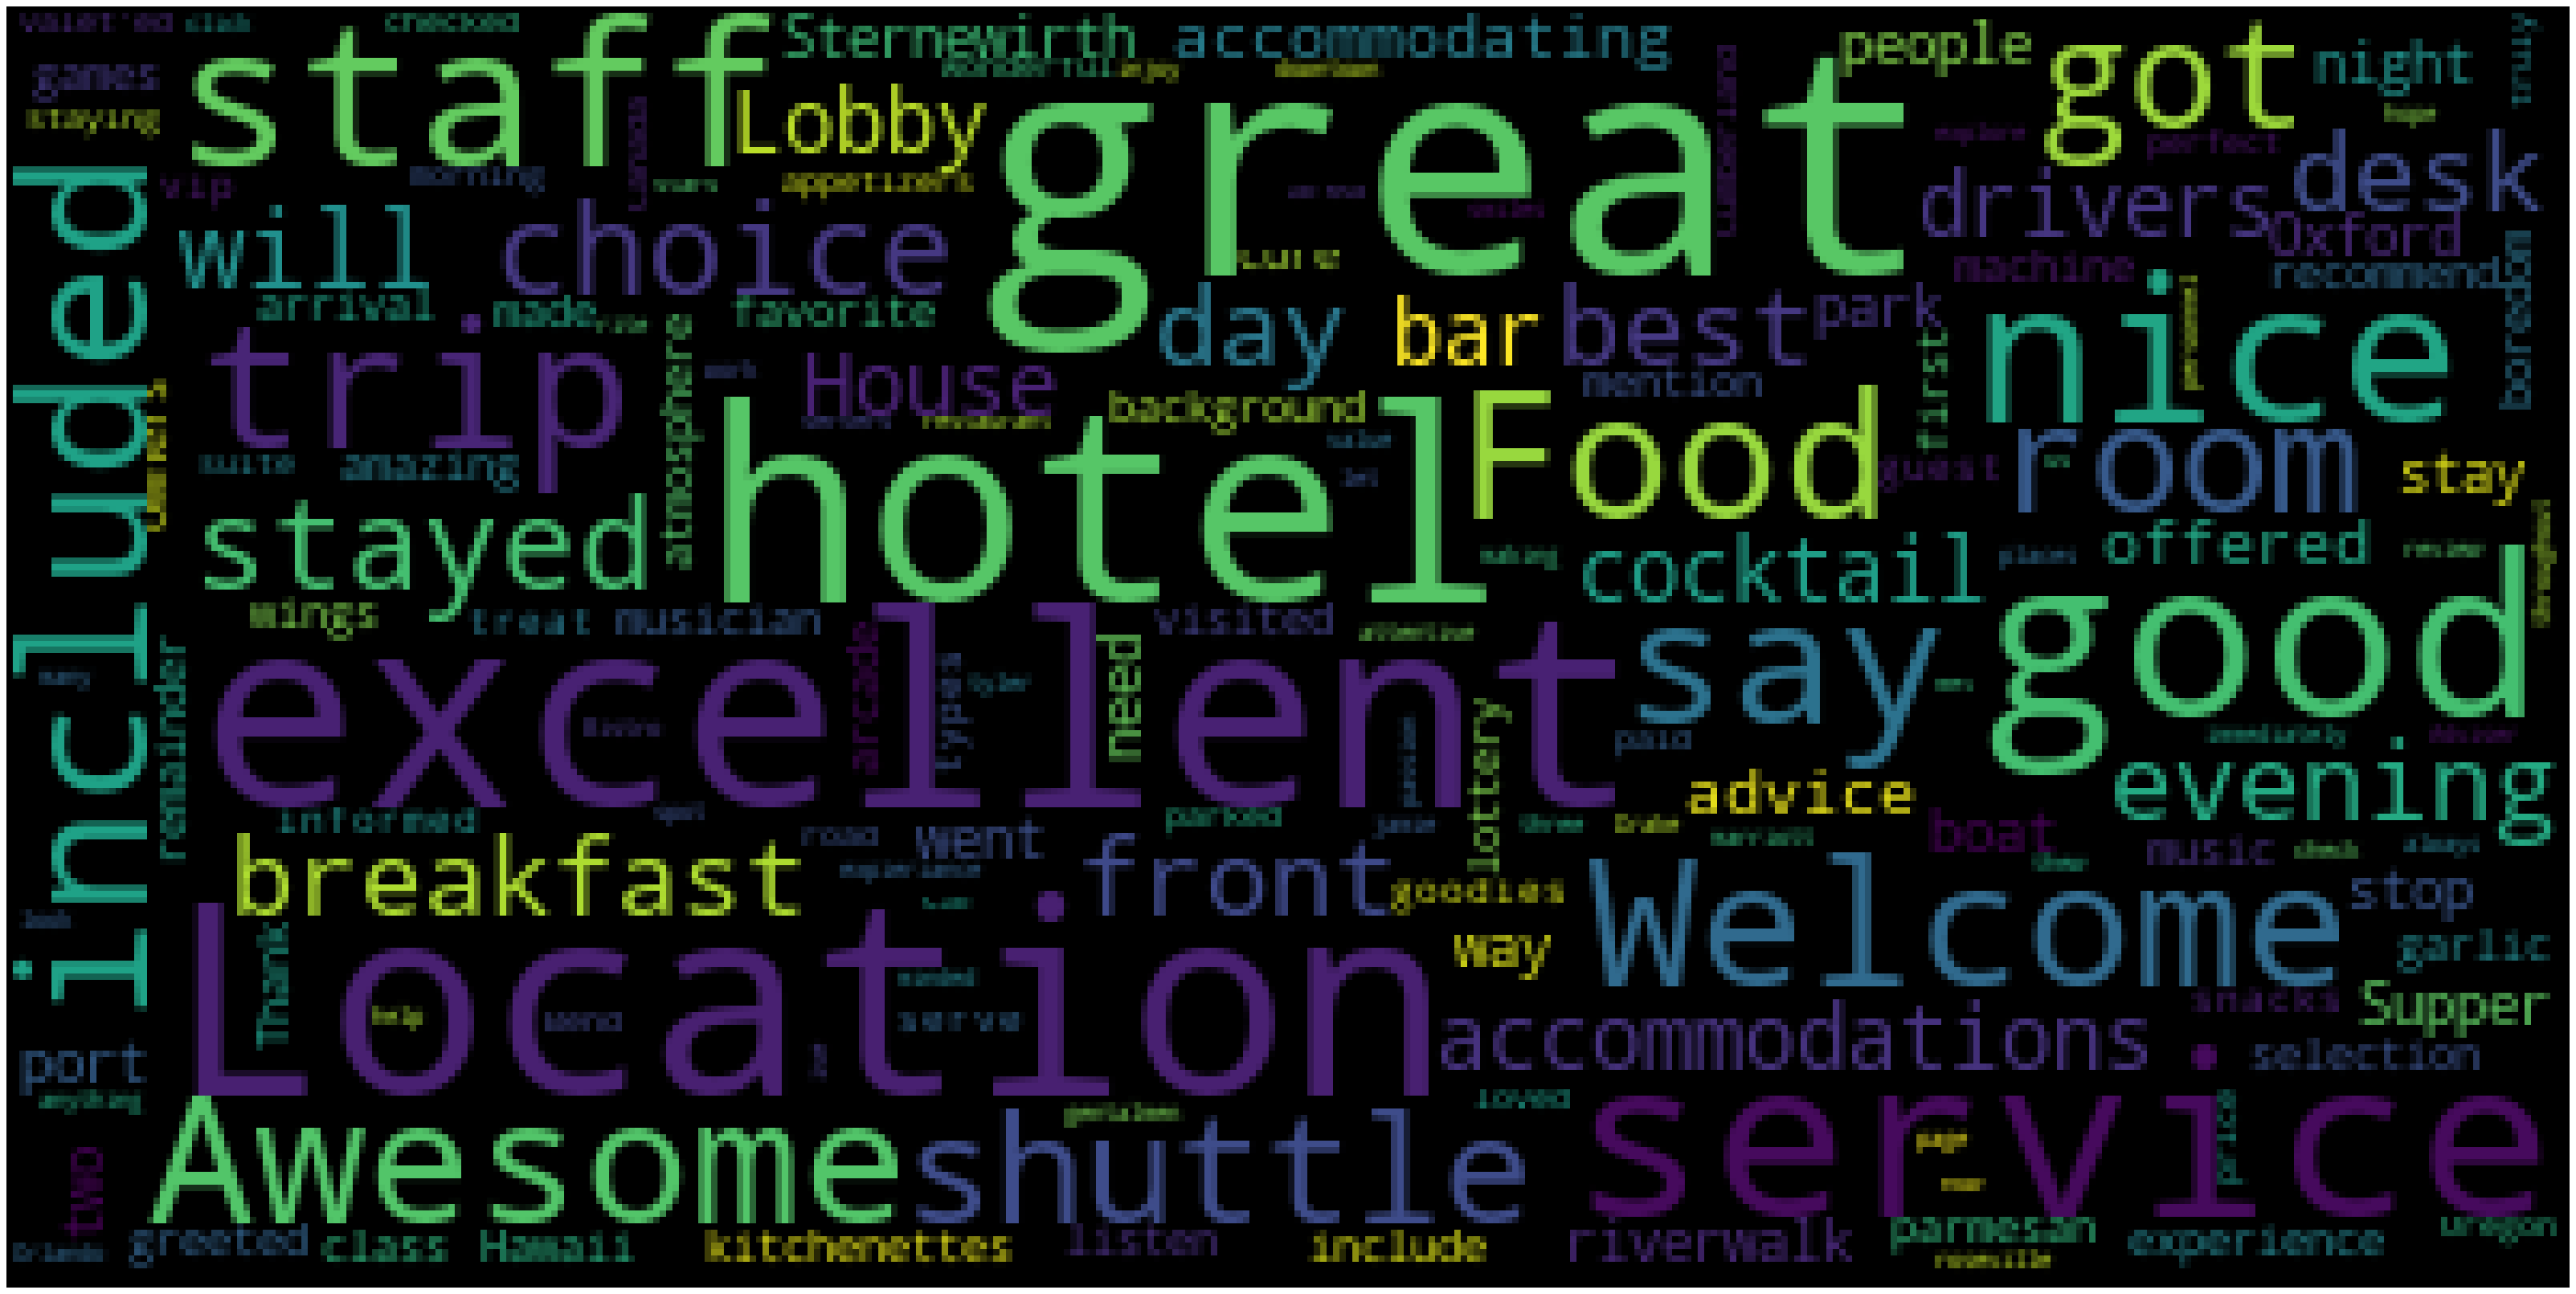

In [27]:
wc(comm['reviews.text'][comm.polarity>0.8],'black','Common Words' )

In [28]:
#Displaying highly negative reviews
comm[['name','reviews.text','polarity','subjectivity']][comm.polarity<-0.4].head(10)

,name,reviews.text,polarity,subjectivity
5564,Knights Inn-murfreesboro,"This place should be shut down because it's so filthy. I have filed a complaint with the Rutherford County Health Department. There were Bedbugs in the room...even a bullet hole in the room's window. The room had stains all over the floor...God only knows what they were, and it smelled like some...",-0.451111,0.697778
5330,Best Western Plus Woodland Hills Hotel & Suites,"The manager was arguing with another guest in front of everybody when we arrived. Our room was not ready at check in time. The elevator stopped working, breakfast was horrible. Our bathroom was clogged up when we arrived and we have to call guest services.",-0.550000,0.750000
2147,Ramada Limited San Diego/Near SeaWorld,I would not recommend this hotel to anyone .. Room was not clean .doors were creaking. beds not comfy.. water in the sink was so poor that it takes minutes to get brush . very bad,-0.497778,0.722222
2339,Days Inn By Wyndham Orlando/International Drive,"Room had a yucky smell, lights did not all work, each day we did not receive towels, workers at the front desk were not very pleasant to deal with and once we arrived, the rate went up from what we was quoted! Will not be staying there again!",-0.440705,0.743590
1510,Civic Center Inn,we booked this hotel and they told us we could cancel our reservation 24 hours before the stay.i read the reviews and saw the hotel was bad. So i canceled. They said there was no cancelation policy. So I canceled my credit card. But then I found out that the charge went through.,-0.700000,0.666667
1681,Hampton Inn Orlando-Maingate South,"Looking for an awful experience at a nasty hotel, this south Orlando Hampton in is for you. Not only will you be hasseled by complete incompetence, the manager (ha, what a joke Natoya Edwards is) will blindly defend her dump then lie to your face and her suoeriors. Do yourself a favor and stay s...",-0.480000,0.813333
6977,Econo Lodge,"The pictures were dirty with brown stuff, the beds were awful, toliet, tub, sink were all dirty, tv dirty, pool furniture was plastic and broke. The most disgusting place ive ever stayed. There is no breakfast except juice, coffee, muffins, toast.",-0.550000,0.816667
2269,Microtel Inn & Suites By Wyndham Augusta/Riverwatch,The hotel is very rundown. I was very disappointed. The mattresses were terrible you could feel Springs,-0.591667,0.758333
2312,Days Inn By Wyndham Orlando/International Drive,I have stayed at days inn in the past this was the worst stay I have ever had I am disabled my friends were to stay close by to help me that is the way the rooms were rented that is not what happened they were put upstairs no air conditioner no phone hook up and maintence said what do you want f...,-0.473333,0.555000
5056,Hyundae Resort Spa,Management has ceased to care. This hotel is run down and how dare them advertise it as a spa/resort. I could go on and on about all the negatives but the worst of the worse was waking up with over forty bed bug bites. Do not stay here. No management on duty to report this detrimental health issue.,-0.518519,0.629630


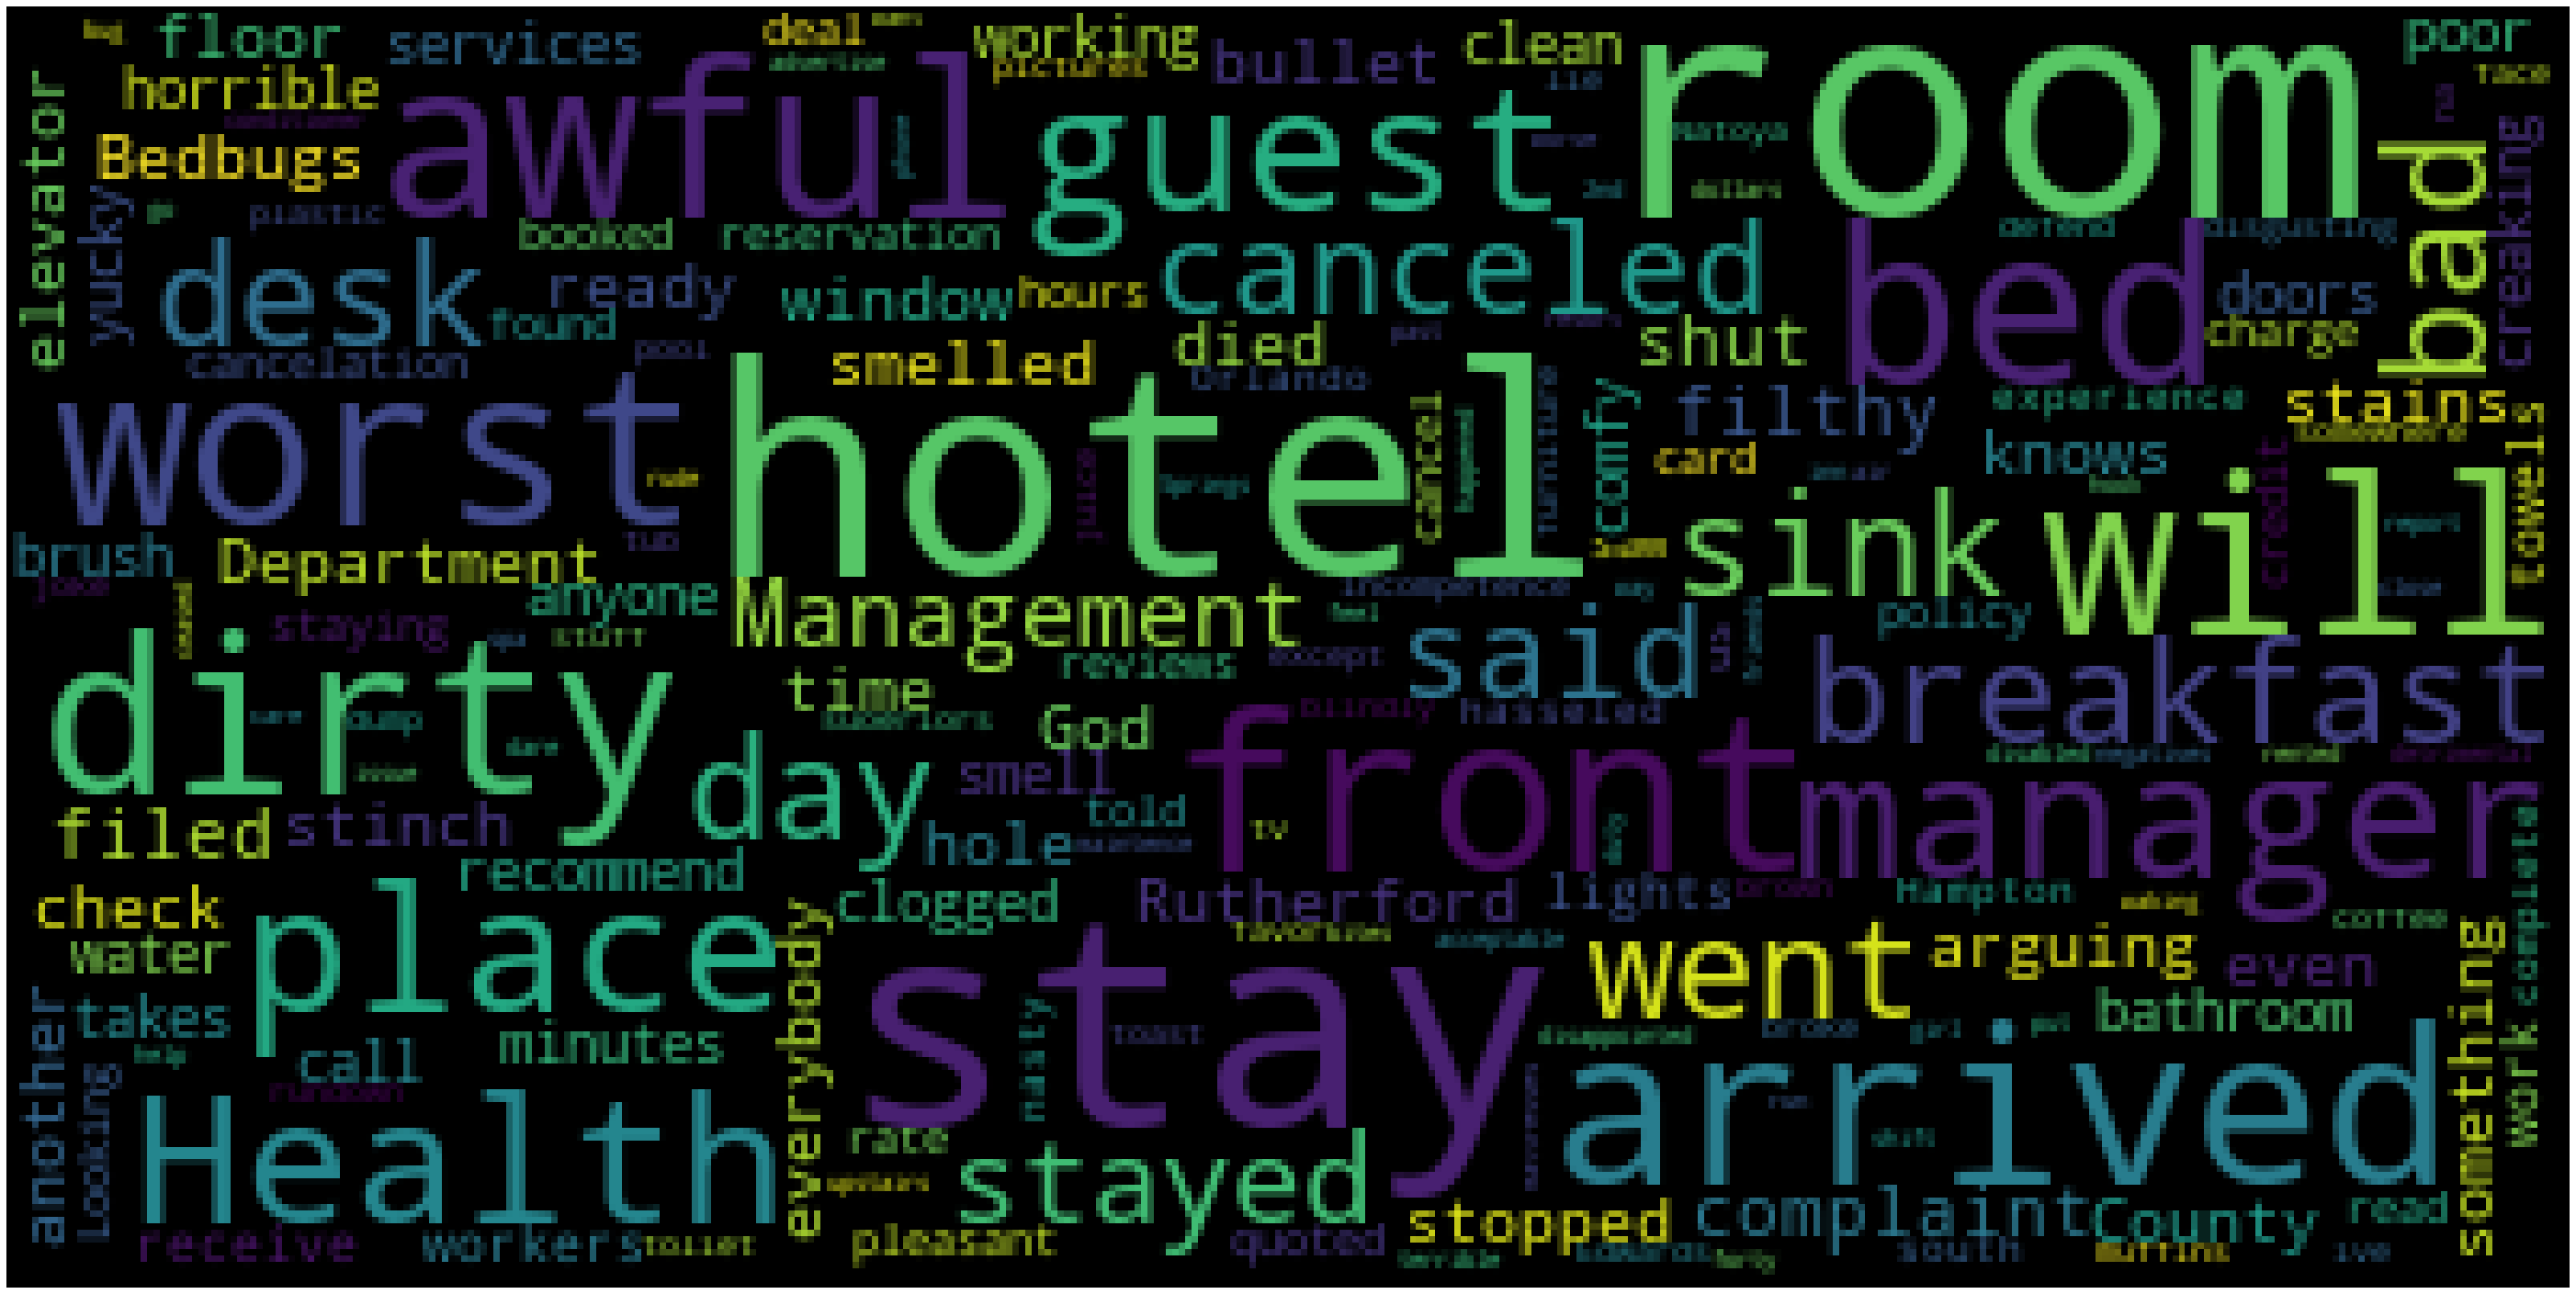

In [29]:
wc(comm['reviews.text'][comm.polarity<-0.4],'black','Common Words' )

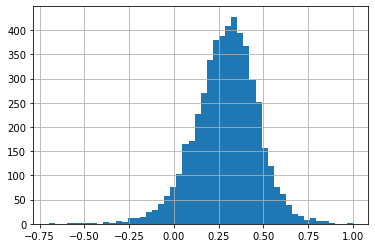

In [30]:
comm.polarity.hist(bins=50)

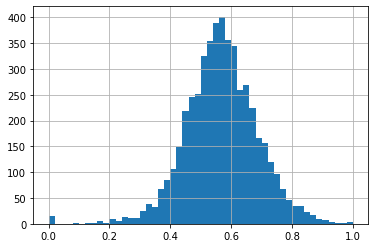

In [31]:
comm.subjectivity.hist(bins=50)

In [32]:
#Converting the polarity values from continuous to categorical
comm['polarity'][comm.polarity==0]= 0
comm['polarity'][comm.polarity > 0]= 1
comm['polarity'][comm.polarity < 0]= -1

 1.0    4743
-1.0     239
 0.0      18
Name: polarity, dtype: int64

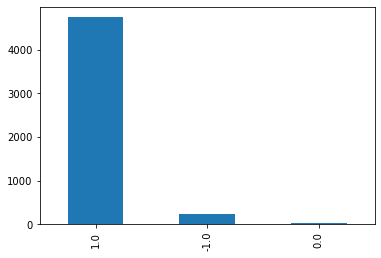

In [33]:
comm.polarity.value_counts().plot.bar()
comm.polarity.value_counts()